In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import numpy as np 

In [2]:
data = np.load("datasets/mnist_train_small.npy")

In [3]:
data

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
X, y = data[:,1:],data[:,0]

In [5]:
y[0]

5

In [6]:
y_hot = OneHotEncoder().fit_transform(y.reshape(-1,1)).todense()

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [7]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [24]:
in_layer=Input(shape = (784,))

In [30]:

d1=Dense(400, activation="sigmoid",name="L1")(in_layer)
d2=Dense(200, activation="sigmoid",name="L2")(d1)
d3=Dense(100, activation="sigmoid",name="L3")(d2)
d4=Dense(50, activation="sigmoid",name="L4")(d3)
out_layer=Dense(10, activation= "softmax", name ="L5")(d4)


In [31]:
model = Model(inputs = [in_layer], outputs = [out_layer])

In [34]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
L1 (Dense)                   (None, 400)               314000    
_________________________________________________________________
L2 (Dense)                   (None, 200)               80200     
_________________________________________________________________
L3 (Dense)                   (None, 100)               20100     
_________________________________________________________________
L4 (Dense)                   (None, 50)                5050      
_________________________________________________________________
L5 (Dense)                   (None, 10)                510       
Total params: 419,860
Trainable params: 419,860
Non-trainable params: 0
_______________________________________________________

In [35]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics =["accuracy"] )

In [37]:
outcome=model.fit([X_train], [y_train], epochs=10)

Train on 13399 samples
Epoch 1/10
13399/13399 [==============================] - 2s 115us/sample - loss: 0.2970 - accuracy: 0.9060
Epoch 2/10
13399/13399 [==============================] - 2s 122us/sample - loss: 0.2841 - accuracy: 0.9107
Epoch 3/10
13399/13399 [==============================] - 2s 117us/sample - loss: 0.2574 - accuracy: 0.9225
Epoch 4/10
13399/13399 [==============================] - 2s 119us/sample - loss: 0.2470 - accuracy: 0.9232
Epoch 5/10
13399/13399 [==============================] - 2s 142us/sample - loss: 0.2398 - accuracy: 0.9258
Epoch 6/10
13399/13399 [==============================] - 2s 128us/sample - loss: 0.2423 - accuracy: 0.9263
Epoch 7/10
13399/13399 [==============================] - 2s 147us/sample - loss: 0.2432 - accuracy: 0.9217
Epoch 8/10
13399/13399 [==============================] - 2s 139us/sample - loss: 0.2497 - accuracy: 0.9202
Epoch 9/10
13399/13399 [==============================] - 2s 147us/sample - loss: 0.2429 - accuracy: 0.9234
Epoch

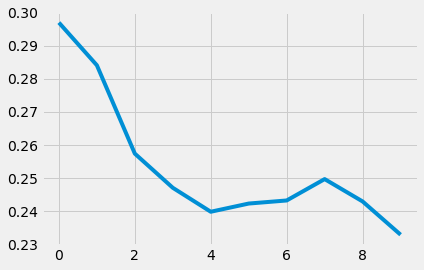

In [38]:
plt.style.use("fivethirtyeight")
plt.plot(outcome.history["loss"])

plt.show()


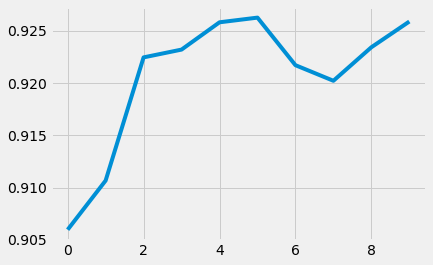

In [39]:
plt.plot(outcome.history["accuracy"])
plt.show()

In [42]:
model.predict(X_test[:10]).argmax(axis=1)

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=int64)

In [43]:
y_test[:10].argmax(axis=1)

matrix([[7],
        [7],
        [0],
        [9],
        [4],
        [5],
        [4],
        [6],
        [9],
        [2]], dtype=int64)